## Data Mining Task 2: Clustering

Dataset: Preprocessed Iris data (features only, no class in clustering)
Tasks: K-Means (k=3), ARI evaluation, elbow curve, visualization, analysis

### Load and Preprocess

We know it's already been preprocessed in task 1, but we are doing it again to confirm.

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (8, 6)
sns.set_style("whitegrid")

# Set seed for reproducibility
np.random.seed(42)

# ==================== 1. LOAD & PREPROCESS (Same as Task 1) ====================
print("🚀 Loading and preprocessing Iris dataset...")

# Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Keep for comparison
species_names = ['setosa', 'versicolor', 'virginica']
df['species_name'] = df['species'].map(lambda x: species_names[x])

# Normalize features
scaler = MinMaxScaler()
feature_cols = iris.feature_names
df_scaled = df.copy()
df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])

# Features for clustering (exclude labels)
X = df_scaled[feature_cols].values
y_true = df['species'].values  # For ARI comparison

print(f"✅ Data ready. Shape: {X.shape}, Classes: {np.unique(y_true, return_counts=True)}")

🚀 Loading and preprocessing Iris dataset...
✅ Data ready. Shape: (150, 4), Classes: (array([0, 1, 2]), array([50, 50, 50], dtype=int64))


### K-means with K = 3

In [6]:
# ==================== 2. K-MEANS WITH K=3 ====================
print("\n🧩 Applying K-Means with k=3...")
kmeans_3 = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
clusters_3 = kmeans_3.fit_predict(X)

# Compare with true labels using Adjusted Rand Index
ari_3 = adjusted_rand_score(y_true, clusters_3)
print(f"✅ K=3 - Adjusted Rand Index (ARI): {ari_3:.3f}")


🧩 Applying K-Means with k=3...
✅ K=3 - Adjusted Rand Index (ARI): 0.716


### Experiment K = 2 and K = 4 and Plot Elbow Curve


📉 Computing elbow curve for k=1 to 10...


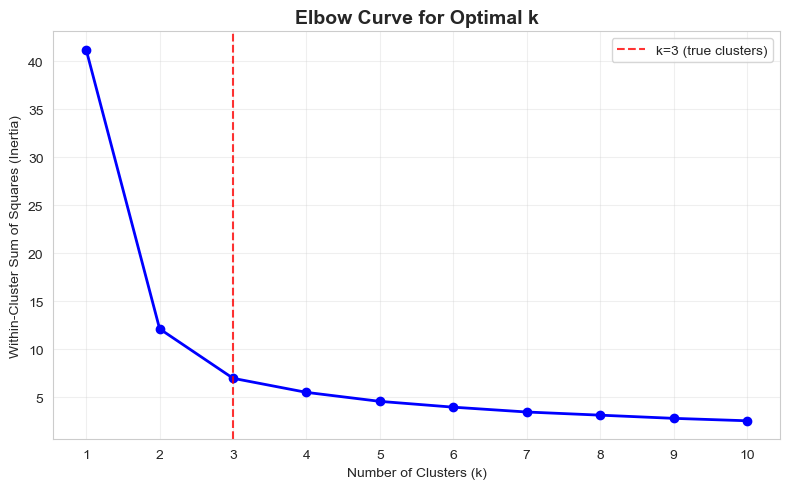

✅ K=2 - Adjusted Rand Index (ARI): 0.568
✅ K=4 - Adjusted Rand Index (ARI): 0.623


In [9]:
# ==================== 3. EXPERIMENT: K=2 AND K=4 + ELBOW CURVE ====================
print("\n📉 Computing elbow curve for k=1 to 10...")

k_range = range(1, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=6)
plt.axvline(x=3, color='red', linestyle='--', label='k=3 (true clusters)', alpha=0.8)
plt.title('Elbow Curve for Optimal k', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(k_range)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("elbow_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# Try k=2 and k=4
for k in [2, 4]:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    clusters = kmeans.fit_predict(X)
    ari = adjusted_rand_score(y_true, clusters)
    print(f"✅ K={k} - Adjusted Rand Index (ARI): {ari:.3f}")

### Visualize Clusters


🖼️ Generating cluster visualization (Petal Length vs Width)...


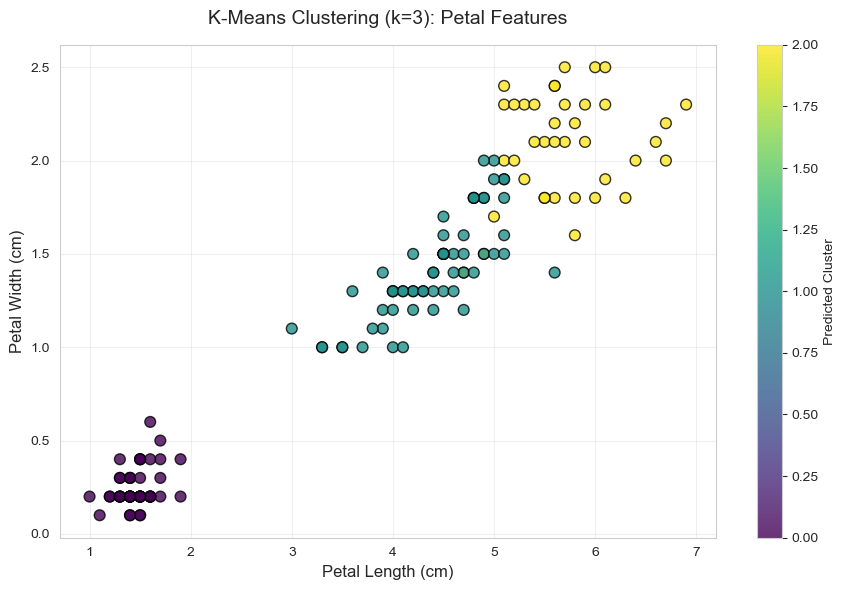

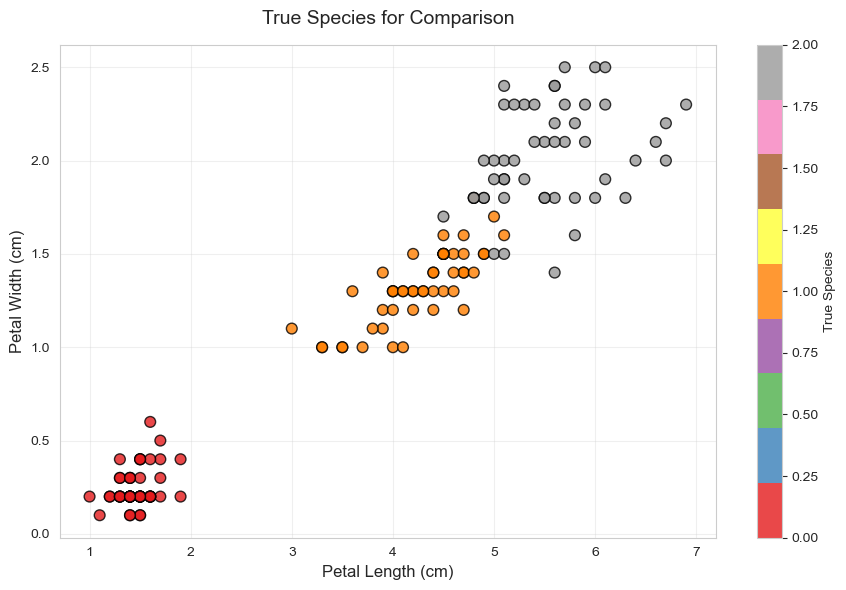


🎯 Final Results:
   K=3 ARI: 0.716
   K=2 ARI: 0.568
   K=4 ARI: 0.621
✅ Clustering completed. Images saved.


In [12]:
# ==================== 4. VISUALIZE CLUSTERS ====================
print("\n🖼️ Generating cluster visualization (Petal Length vs Width)...")

# Use original unscaled features for meaningful axis labels
plt.figure(figsize=(9, 6))
scatter = plt.scatter(
    df['petal length (cm)'], df['petal width (cm)'],
    c=clusters_3, cmap='viridis', s=60, edgecolor='k', alpha=0.8
)
plt.colorbar(scatter, label='Predicted Cluster')
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.title('K-Means Clustering (k=3): Petal Features', fontsize=14, pad=15)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("cluster_visualization.png", dpi=300, bbox_inches='tight')
plt.show()

# Optional: Compare with true species
plt.figure(figsize=(9, 6))
scatter_true = plt.scatter(
    df['petal length (cm)'], df['petal width (cm)'],
    c=y_true, cmap='Set1', s=60, edgecolor='k', alpha=0.8
)
plt.colorbar(scatter_true, label='True Species')
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.title('True Species for Comparison', fontsize=14, pad=15)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("true_species_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# ==================== 5. FINAL RESULTS ====================
print(f"\n🎯 Final Results:")
print(f"   K=3 ARI: {ari_3:.3f}")
print(f"   K=2 ARI: {adjusted_rand_score(y_true, KMeans(n_clusters=2, random_state=42).fit_predict(X)):.3f}")
print(f"   K=4 ARI: {adjusted_rand_score(y_true, KMeans(n_clusters=4, random_state=42).fit_predict(X)):.3f}")
print("✅ Clustering completed. Images saved.")